# EVAUATION 3 - AVACADO PROJECT

## Problem Statement:


#### Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.  

In [1]:
#importing all the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import os

In [2]:
#getting data
os.chdir("C:\GitBash\Files")
df = pd.read_csv("avocado.csv")

## DATA INSPECTION 

In [3]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
13192,11,2016-10-09,1.45,1613.43,8.14,35.29,0.00,1570.00,1566.67,3.33,0.0,organic,2016,MiamiFtLauderdale
1030,42,2015-03-08,1.07,160438.38,6082.65,97697.59,10846.32,45811.82,27937.40,15551.62,2322.8,conventional,2015,Indianapolis
15096,37,2017-04-16,1.67,194263.40,28602.39,68759.01,7.85,96894.15,87693.86,9200.29,0.0,organic,2017,California
12317,20,2016-08-07,1.65,10375.29,405.22,5999.14,1492.11,2478.82,2422.15,56.67,0.0,organic,2016,Charlotte
12667,6,2016-11-13,2.28,1284.68,69.31,822.04,0.00,393.33,393.33,0.00,0.0,organic,2016,GrandRapids


In [5]:
df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

OBSERVATION

Unnamed: 0  - Not useful .it just shows serial number.

Date - The date of the observation

Average Price - The average price of a single avocado

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Total Bags - Total number of bags that were given out

Small Bags - Total number of small bags that were given out

Large Bags - Total number of large bags that were given out

XLarge Bags - Total number of extra large bags that were given out

Type - Whether it is conventional or organic

Year - The year information

Region - The city or region of the observation


In [7]:
#shape of data
df.shape

(18249, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
#lets chcekk the null values
df.isnull().sum()


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

OBSERVATION 

There are no null values present in our data set.




In [10]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)


In [11]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

OBSERVATION

All the unique values present in each column are listed here.

## FEATURE ENGINEERING 

In [12]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [13]:
# Checking the type of data again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [14]:
df["Month"] = df["Date"].dt.month


In [15]:
df["Day"] = df["Date"].dt.day

Since we have separate Day and Date column so now an independent Date column is of no use ,so we wil drop it

In [16]:
df.drop("Date",axis=1,inplace=True)

In [17]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

#### WE HAVE TWO TARGET COLUMNS IN THIS DATA SET  . LET'S CHECK THE UNIQUENESS OF BOTH TARGET COLUMNS. 

In [18]:
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [19]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

##  STATISTICAL SUMMARY

In [20]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


OBSERVATION

By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps. Before visualizing the data let's separate the categorical and numerical columns.

In [21]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


In [22]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


OBSERVATION
There are two Categorial columns 'type', 'region' which we will encode these columns using either label encoder or one hot encoder.

Other columns are numerical columns.


# EXPLORATORY DATA ANALYSIS (EDA)

### UNIVARIATE ANALYSIS

#### COUNTPLOT 

conventional    9126
organic         9123
Name: type, dtype: int64


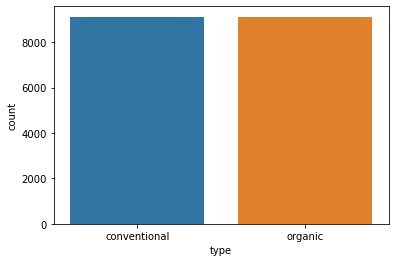

In [23]:
print(df['type'].value_counts())
sns.countplot(x='type', data=df)
plt.show()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


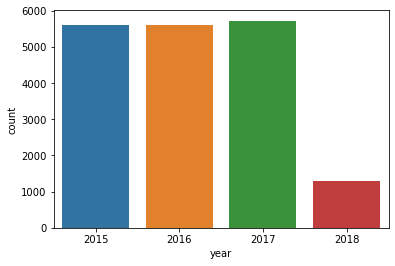

In [24]:
print(df['year'].value_counts())
sns.countplot(x='year', data=df)
plt.show()

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


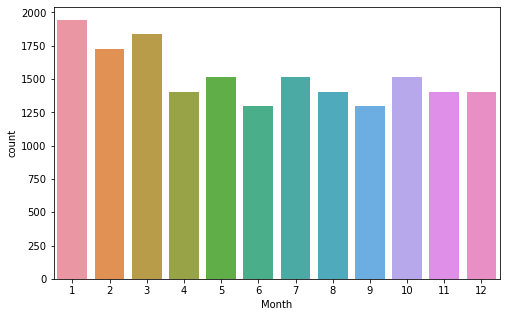

In [25]:
print(df['Month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=df)
plt.show()

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Day, dtype: int64


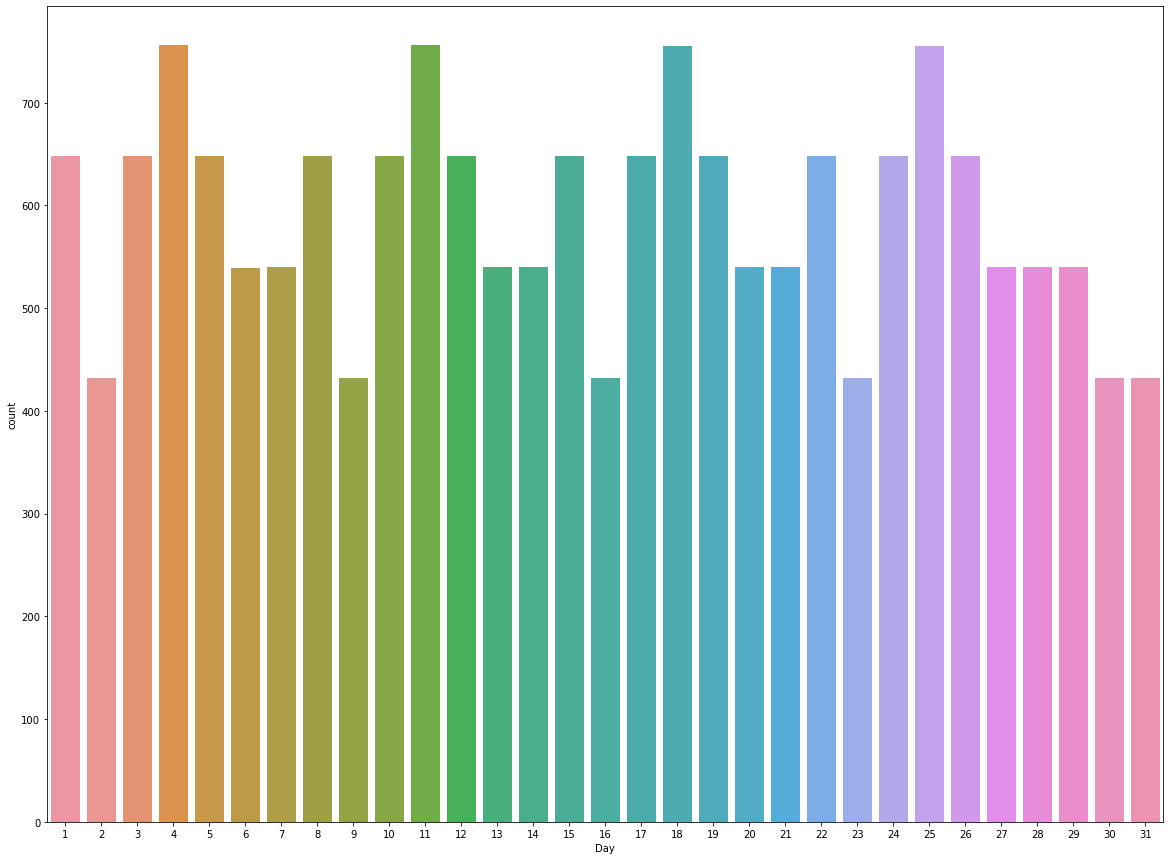

In [26]:
print(df['Day'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Day', data=df)
plt.show()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

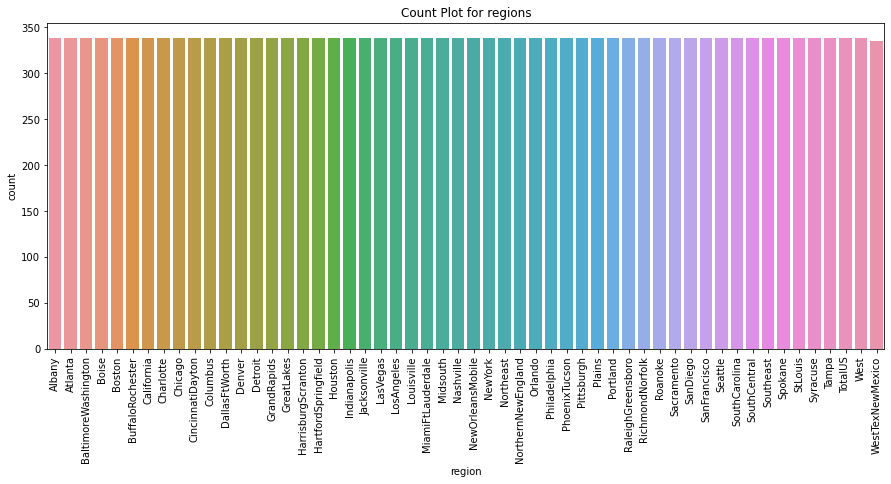

In [27]:
print(df['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(df['region'], data=df)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

OBSERVATION

In the "type" column we have data points for conventional and organic avacados.

In the "year" column we see the the datapoints are very less for 2018 compared to the one's in 2015, 2016 and 2017.

In the "Month" column we can see the least datapoints in the month of June that is number 6 and the highest value concentration is present in the month of January that is number 1.

In the "Date" column we can see multiple date with highest and lowest datapoint concentration. Like in the highest values we have dates 11 and 4 while for lowest values we have dates 30, 16, 9, 23, 2 and 31

In the "region" column we can see that the data points for almost all the values are same except WestTexNewMexico region which is a bit less than the others present in the column.

### MULTIVARIANT ANALYSIS

<Figure size 1080x720 with 0 Axes>

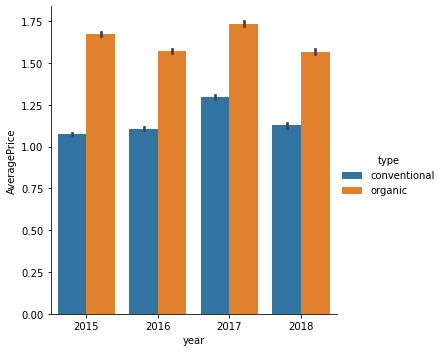

In [28]:
plt.figure(figsize=(15,10))
sns.catplot(x="year",y="AveragePrice",hue="type", data=df, kind="bar")
plt.show()


<Figure size 1080x720 with 0 Axes>

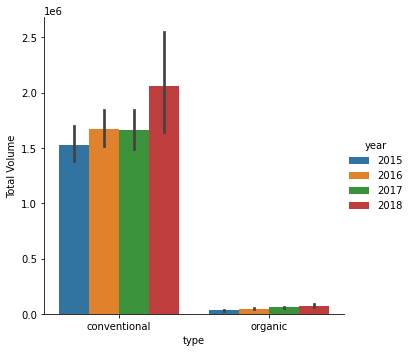

In [29]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=df)
plt.show()

<Figure size 1080x720 with 0 Axes>

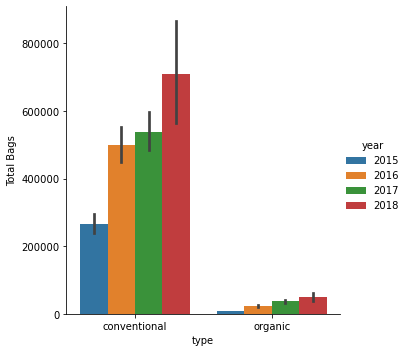

In [30]:
plt.figure(figsize=(15,10))
sns.catplot(x="type",y="Total Bags",hue="year", data=df, kind="bar")
# show plot
plt.show()

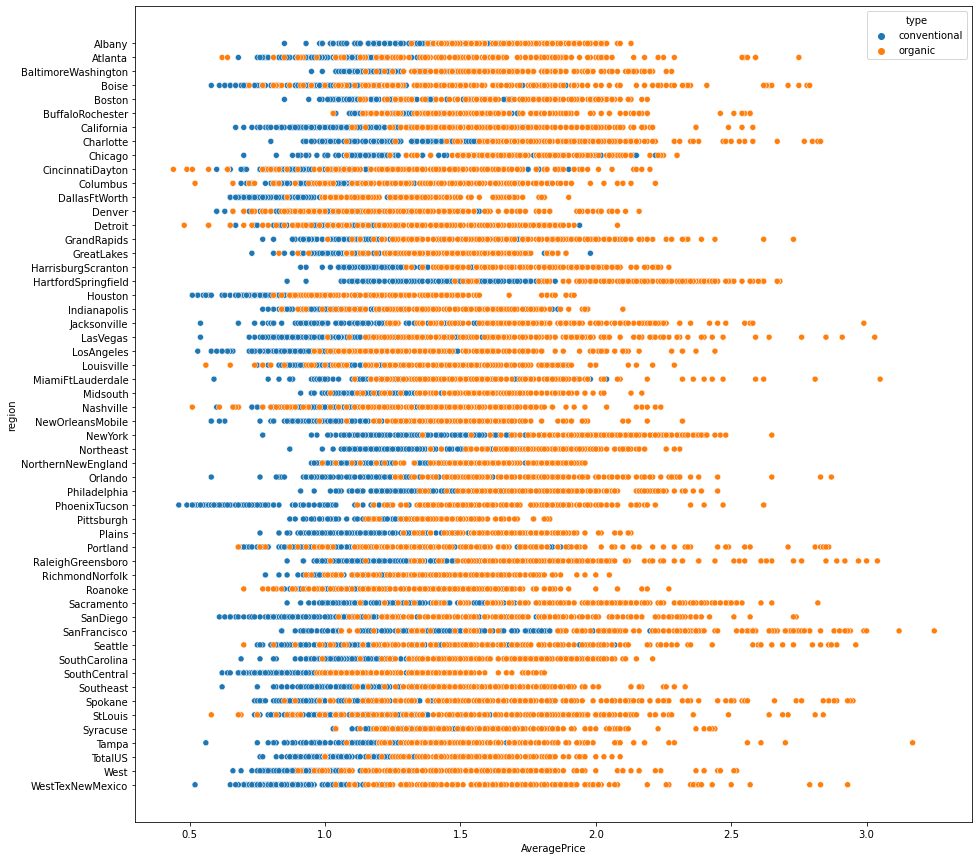

In [31]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="AveragePrice",y="region",hue="type", data=df)
# show plot
plt.show()

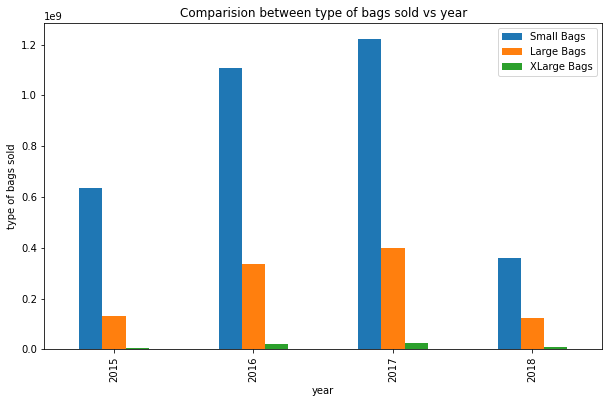

In [32]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("year")
plt.ylabel("type of bags sold")
plt.show()

### PAIR PLOT 

In [33]:
sns.pairplot(df,hue="AveragePrice")

Error in callback <function flush_figures at 0x000001A0EE7D6670> (for post_execute):


KeyboardInterrupt: 

# Regression Model Prediction when Target column is "Average Price"

### CORRELATION 

In [34]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'year'),
  Text(0, 10.5, 'Month'),
  Text(0, 11.5, 'Day')])

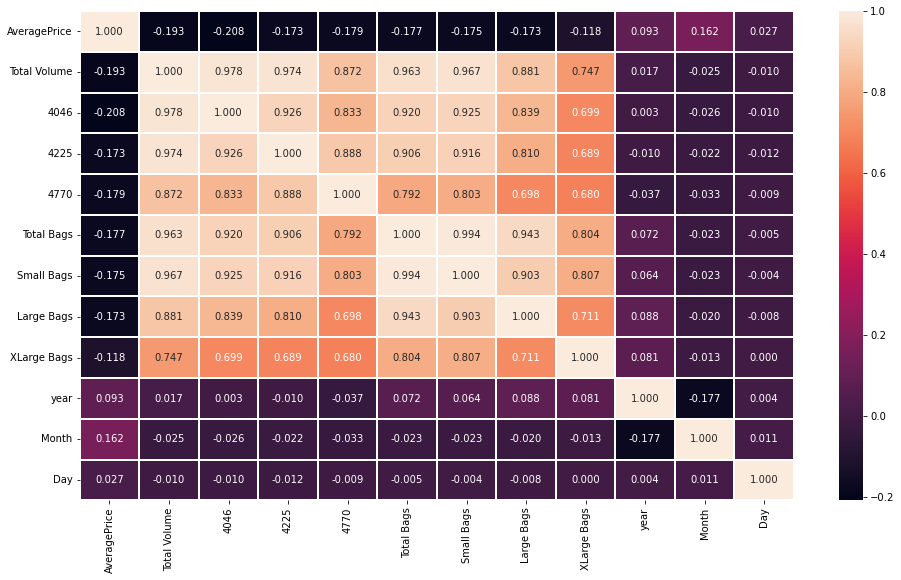

In [35]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)


OBSERVATION

Most of the features are highly negatively correlated with the target variable.

Columns year, Month and type have positive correlation with the target.

Day have no relation with the target so we can drop the Day column.

Most of the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF method.








##### Visualizing the correlation between label and features using bar plot

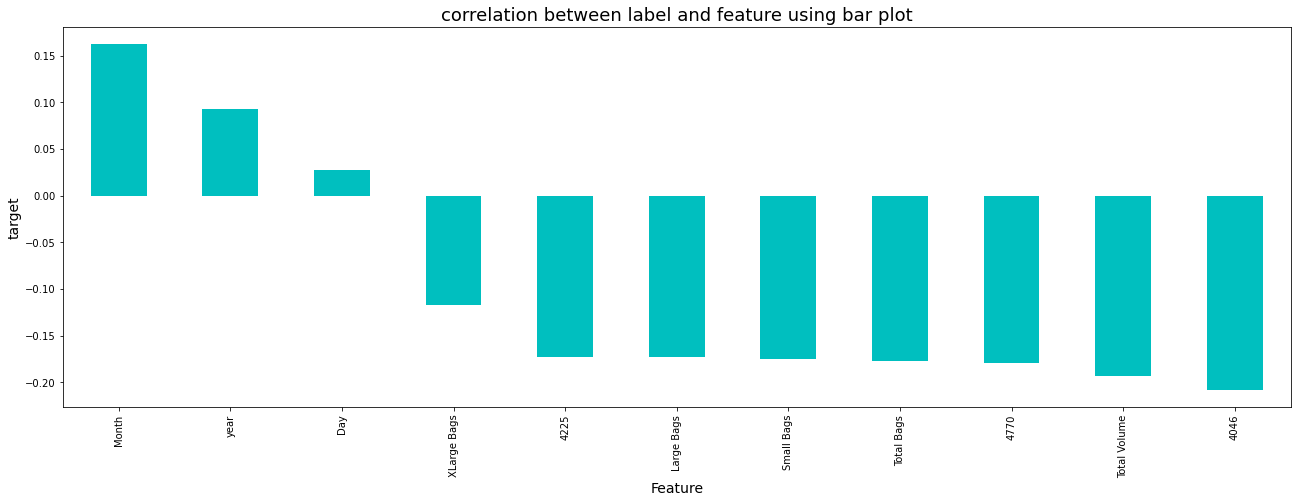

In [36]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

OBSERVATION 

Column Day has very less correlation with the target variable we will drop Day column while doing Data Cleaning.

## SKEWNESS 

In [37]:
num_features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


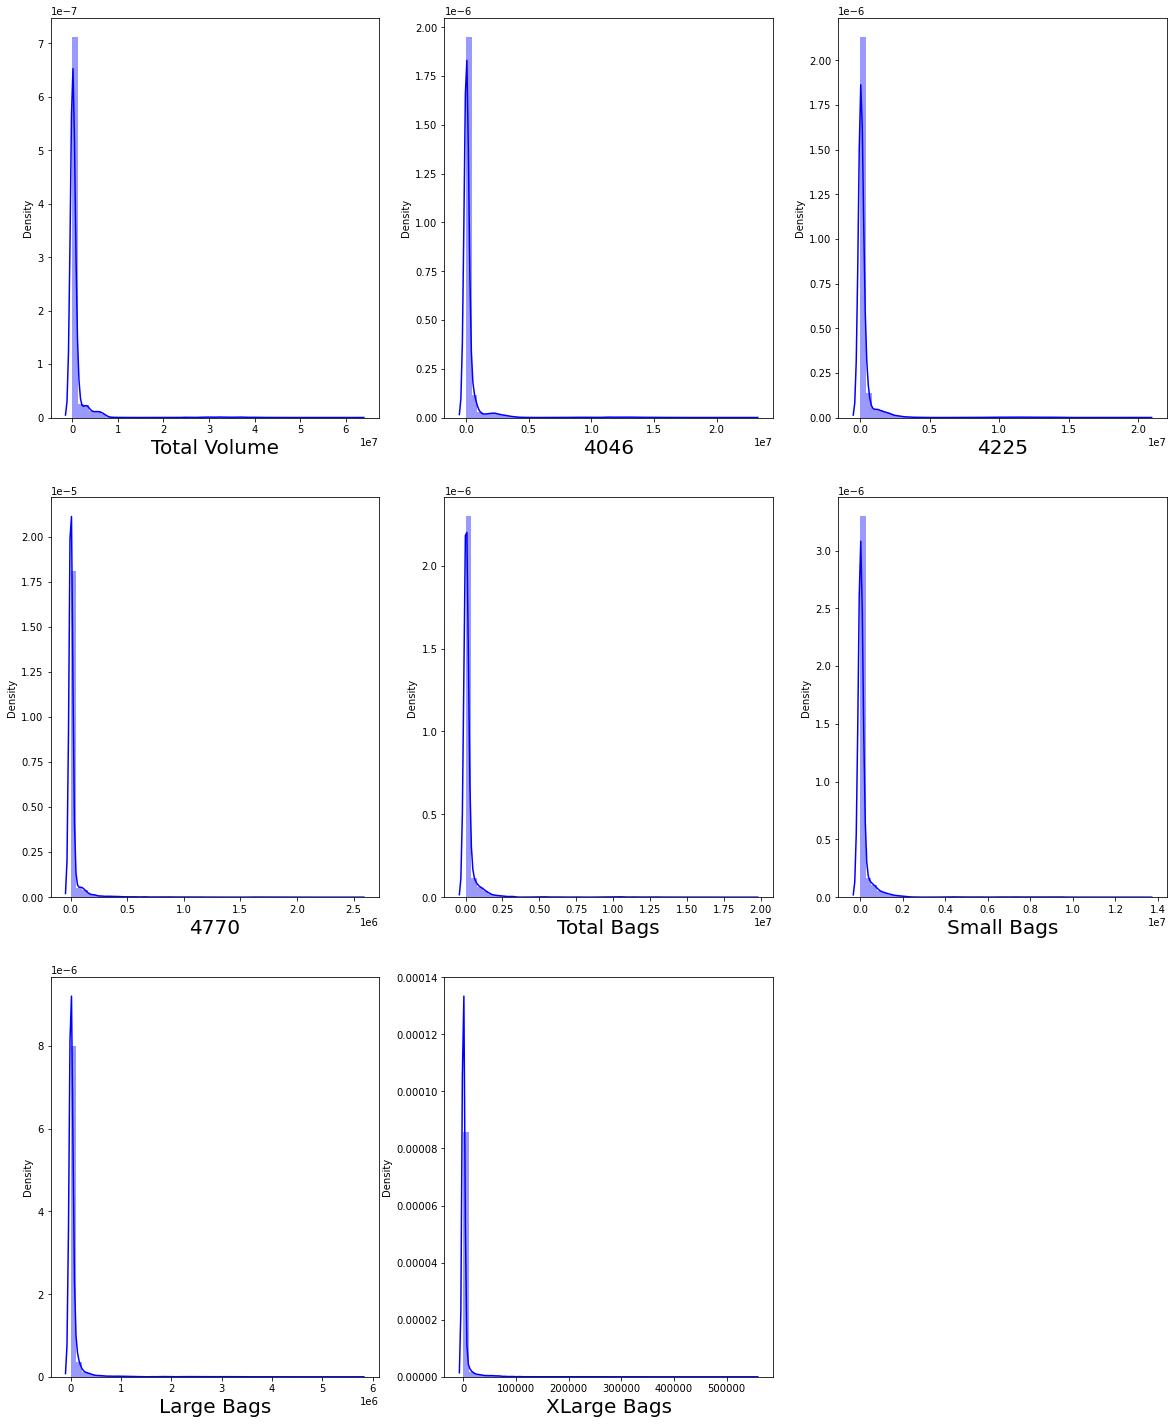

In [38]:
# let's check how the numerical data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[num_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [39]:
df.skew().sort_values()

Day              0.014310
Month            0.106617
year             0.215339
AveragePrice     0.580303
4046             8.648220
4225             8.942466
Total Volume     9.007687
Small Bags       9.540660
Total Bags       9.756072
Large Bags       9.796455
4770            10.159396
XLarge Bags     13.139751
dtype: float64

OBSERVATION

Skewness is present in most of the columns.

## OUTLIERS 

In [40]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

AveragePrice       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Total Volume    AxesSubplot(0.327174,0.657941;0.168478x0.222059)
4046            AxesSubplot(0.529348,0.657941;0.168478x0.222059)
4225            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
4770               AxesSubplot(0.125,0.391471;0.168478x0.222059)
Total Bags      AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Small Bags      AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Large Bags      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
XLarge Bags           AxesSubplot(0.125,0.125;0.168478x0.222059)
year               AxesSubplot(0.327174,0.125;0.168478x0.222059)
Month              AxesSubplot(0.529348,0.125;0.168478x0.222059)
Day                AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

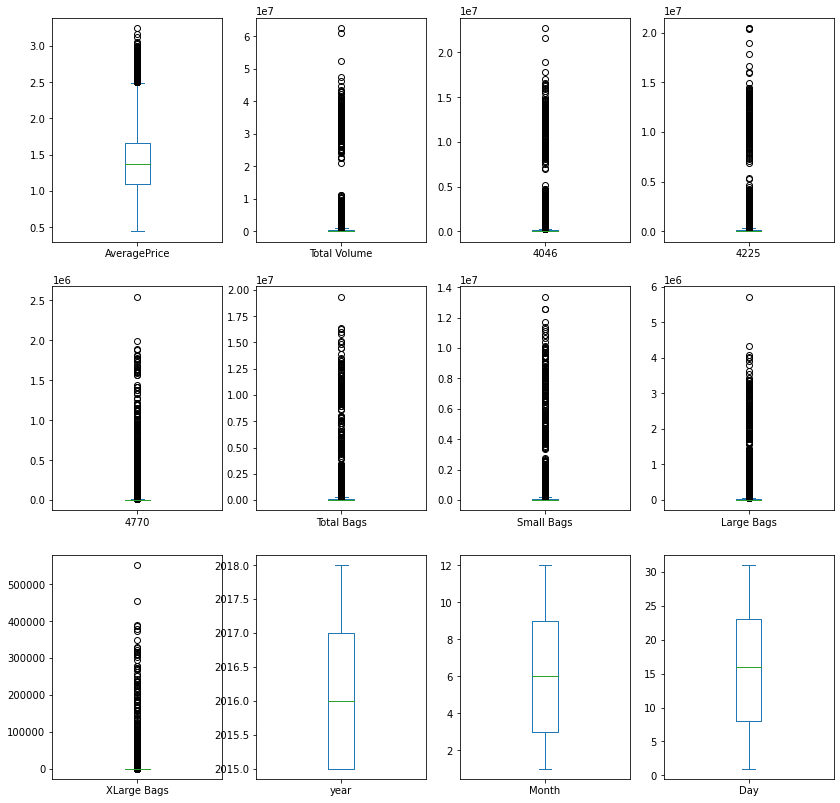

In [41]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(14,14))

OBSERVATION

Outliers are present in most of the columns.

## DATA PREPROCESSING 

### DATA CLEANING

Since Day column has very less correlation with the target variable we will drop Day column

In [42]:
df.drop('Day',axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


## REMOVING OUTLIERS 

#### Z SCORE 

In [43]:
#features containing outliers
out_features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]


In [44]:
#using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(out_features))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [45]:
#creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [46]:
#shape of new dataframe
new_df.shape

(17782, 13)

#### LOSS PERCENTAGE

In [47]:
loss_percent=(18249-17782)/18249*100
print(loss_percent,'%')

2.55904433119623 %


OBSERVATION

2.559% data loss is acceptable

df_new is the new data set after 2 column are removed and all the outliers apart from average price column (with z<3 z score) are removed

In [48]:
new_df.skew().sort_values()

Month           0.098217
year            0.220792
AveragePrice    0.560969
Total Volume    3.782060
Total Bags      4.082103
Small Bags      4.238647
4225            4.472729
4046            4.928850
Large Bags      5.072468
4770            5.137120
XLarge Bags     6.159391
dtype: float64

#### REMOVING SKEWNESS USING POWER TRANSFORMER 

In [49]:
#removing skewness using yeo-johnson method
skew = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


In [50]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [51]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [52]:
new_df.skew().sort_values()

Large Bags     -0.110061
4225           -0.043246
4046           -0.038259
Small Bags     -0.024657
Total Bags     -0.021531
Total Volume   -0.006809
4770            0.028015
Month           0.098217
year            0.220792
AveragePrice    0.560969
XLarge Bags     0.860603
dtype: float64

In [53]:
#removing skewness again using log transformation
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])

In [54]:
new_df.skew().sort_values()

Large Bags     -0.110061
4225           -0.043246
4046           -0.038259
Small Bags     -0.024657
Total Bags     -0.021531
Total Volume   -0.006809
4770            0.028015
Month           0.098217
year            0.220792
AveragePrice    0.560969
XLarge Bags     0.791499
dtype: float64

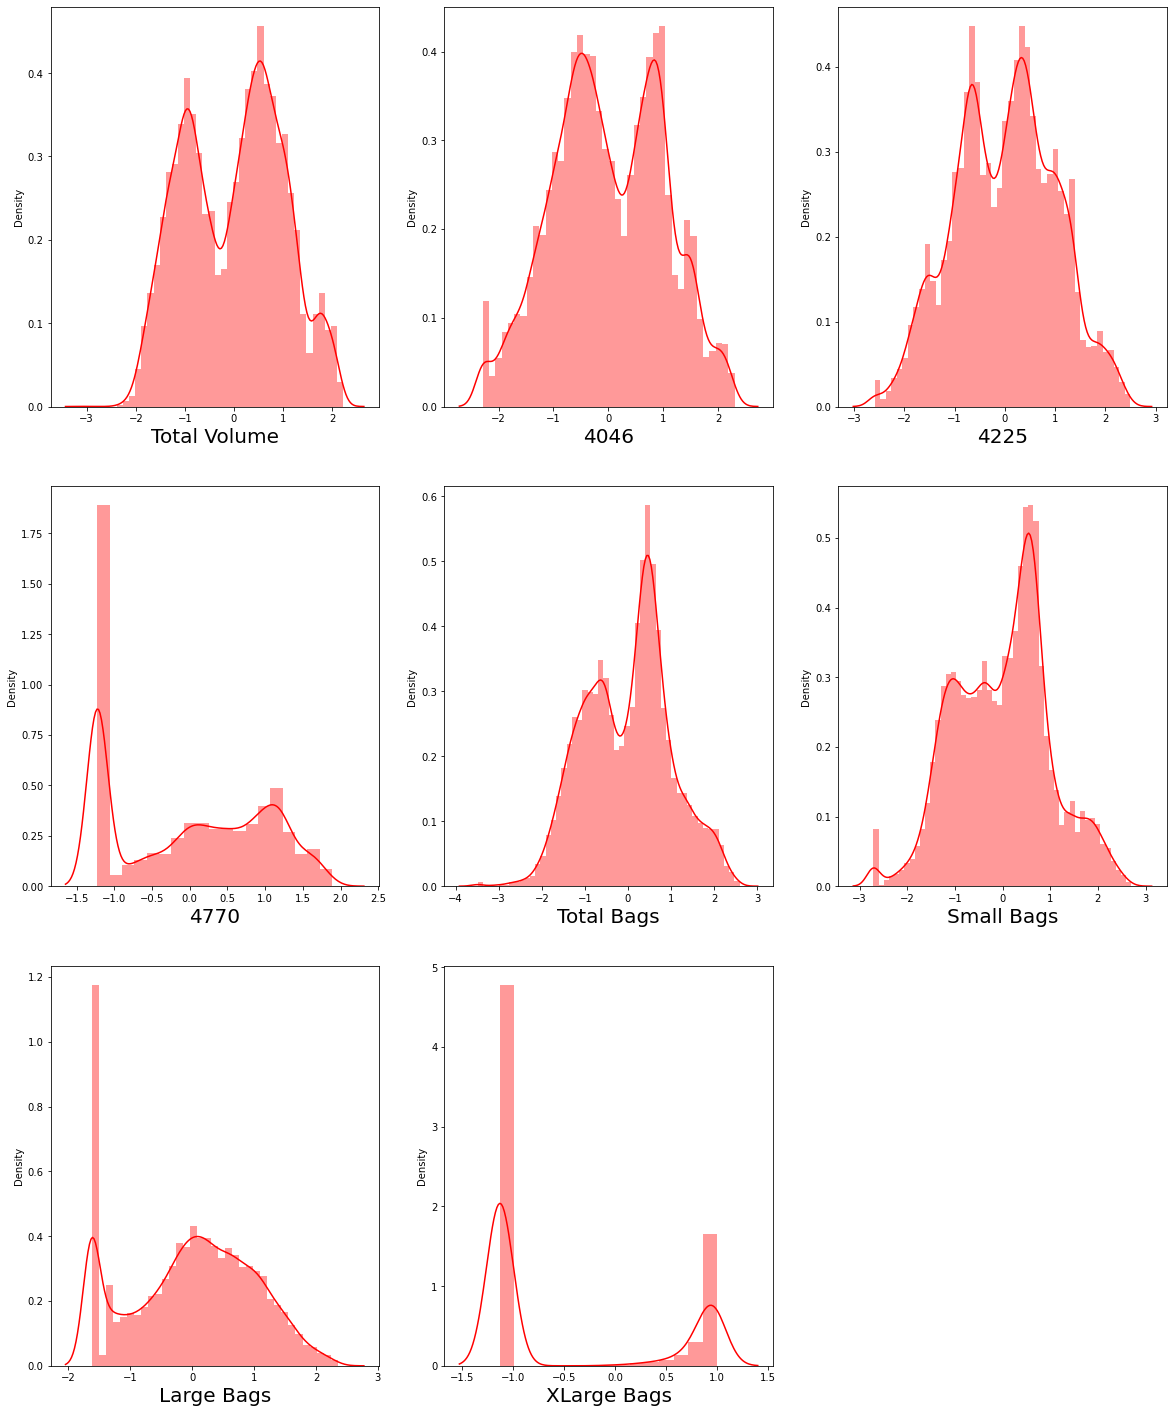

In [55]:
# let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

OBSERVATION

The data looks almost normal compared to previous distribution plots before transformation and the skewness is also reduced.

## ENCODING CATEGORIAL COLUMNS USING LABEL ENCODER 

In [56]:
categorical_col = ["type","region"]

In [57]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [58]:
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


## Splitting the new dataset into Features and Targe 

In [59]:
x = new_df.drop("AveragePrice",axis=1)
y = new_df["AveragePrice"]

In [60]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-1.126094,1,2018,53,2
18245,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-1.126094,1,2018,53,1
18246,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-1.126094,1,2018,53,1
18247,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-1.126094,1,2018,53,1


In [61]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17782, dtype: float64

In [62]:
x.shape

(17782, 12)

In [63]:
y.shape

(17782,)

## STANDARD SCALING 

In [64]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,-1.698613,1.358706
...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,1.742552,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,1.742552,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,1.742552,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,1.742552,-1.468572


## MultiCollinearity with Variance Inflation Factor 

In [65]:
# Importing Required Libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [66]:
calc_vif(x)

,Features,VIF values
0,Total Volume,52.131276
1,4046,7.153485
2,4225,11.169168
3,4770,3.952857
4,Total Bags,34.509723
5,Small Bags,16.635346
6,Large Bags,3.462946
7,XLarge Bags,2.071298
8,type,3.757728
9,year,1.386245


OBSERVATION

The VIF value is more than 10 in the features Total Volume, 4225, Total Bags, Small Bags and Large Bags. First I will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.

In [67]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [68]:
calc_vif(x)

,Features,VIF values
0,4046,3.742061
1,4225,4.283636
2,4770,3.938377
3,Total Bags,24.480097
4,Small Bags,16.635006
5,Large Bags,3.420844
6,XLarge Bags,2.058386
7,type,3.540936
8,year,1.383804
9,region,1.078624


In [69]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [70]:
calc_vif(x)

,Features,VIF values
0,4046,3.723365
1,4225,4.138882
2,4770,3.938119
3,Small Bags,4.101853
4,Large Bags,1.866013
5,XLarge Bags,2.058144
6,type,3.537713
7,year,1.359335
8,region,1.078618
9,Month,1.051469


OBSERVATION

The VIF value is less than 10 in all the features which means we have solved the multicollinearity problem. Now we can move to model building.

In [71]:
#dataFrame after preprocessing and data cleaning
x.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
1,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
2,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
3,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
4,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,-1.698613,1.358706


## MACHINE LEARNING

Finding best random state using KNN

In [72]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [73]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred_train = mod.predict(x_train)
    pred_test = mod.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1, the training accuracy is : 0.921620153449776
At random state 1, the testing accuracy is :  0.8719313983472506


At random state 2, the training accuracy is : 0.9209812375111216
At random state 2, the testing accuracy is :  0.8702590471466893


At random state 3, the training accuracy is : 0.9207016292423981
At random state 3, the testing accuracy is :  0.8772768861194032


At random state 4, the training accuracy is : 0.9211002469217207
At random state 4, the testing accuracy is :  0.8696353624459375


At random state 5, the training accuracy is : 0.9219250448658022
At random state 5, the testing accuracy is :  0.8679716359343219


At random state 6, the training accuracy is : 0.9209346301304522
At random state 6, the testing accuracy is :  0.8685150754257454


At random state 7, the training accuracy is : 0.9233446943096436
At random state 7, the testing accuracy is :  0.8605475071080435


At random state 8, the training accuracy is : 0.9211802938692523
At random st

In [76]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8845072351741969  on Random_state  194


OBSERVATION

R2 score is maximum at 88.45% on Random_state 194. 

The training and testing acccuracy is closest at 194 random state.

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=194)


In [75]:
mod = KNN()

In [76]:
mod.fit(x_train,y_train)

KNeighborsRegressor()

In [77]:
pred_test = mod.predict(x_test)

In [78]:
print(r2_score(y_test,pred_test))

0.8845072351741969


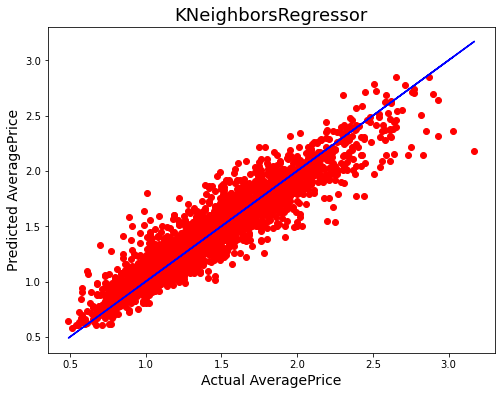

In [79]:
#drawing regression plot
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual AveragePrice', fontsize=14)
plt.ylabel('Predicted AveragePrice', fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()

### Since the y (Target Column='Average Price') has continuous values we will use Linear Regression model. 

####  RUNNING DATA ON ALL REGRESSORS FOR FINDING BEST REGRESSOR

In [80]:
# importing all the required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [81]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=194)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [82]:
#Linear Regression
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 0.28888806751465856
R2 Score is: 50.212466067093565
Cross Validation Score is: 8.855676789690044
R2 Score - Cross Validation Score is 41.35678927740352


In [83]:
#L1- Lasso Regression
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.28879817620896114
R2 Score is: 50.24344533301605
Cross Validation Score is: 9.091441008659558
R2 Score - Cross Validation Score is 41.15200432435649


In [84]:
#L2  Ridge Regression
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.28888806687663715
R2 Score is: 50.21246628700926
Cross Validation Score is: 8.855680451384469
R2 Score - Cross Validation Score is 41.35678583562479


In [85]:
#Elastic Net
model=ElasticNet(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.28882711776746034
R2 Score is: 50.233472247922094
Cross Validation Score is: 9.014451253148207
R2 Score - Cross Validation Score is 41.219020994773885


In [86]:
#Support Vector Regression
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 0.18372243678580716
R2 Score is: 79.86341582126688
Cross Validation Score is: 0.7958673353282575
R2 Score - Cross Validation Score is 79.06754848593863


In [87]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 0.23752034474155168
R2 Score is: 66.34395824554605
Cross Validation Score is: -21.686911026409472
R2 Score - Cross Validation Score is 88.03086927195552


In [88]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 0.2905481046095864
R2 Score is: 49.63863401329567
Cross Validation Score is: 7.797822208663921
R2 Score - Cross Validation Score is 41.84081180463175


In [89]:
#Decision Tree Regressor
model=DecisionTreeRegressor(random_state=194)
regressor(model, x, y)

Root Mean Square Error is: 0.18998157731439175
R2 Score is: 78.46799925985171
Cross Validation Score is: -33.09222015117015
R2 Score - Cross Validation Score is 111.56021941102186


In [90]:
#Random Forest Regressor
model=RandomForestRegressor(random_state=194)
regressor(model, x, y)

Root Mean Square Error is: 0.1311321069221493
R2 Score is: 89.74160337822214
Cross Validation Score is: 20.485198600719297
R2 Score - Cross Validation Score is 69.25640477750284


In [91]:
#K Neighbors Regressor
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.13913829753882173
R2 Score is: 88.45072351741969
Cross Validation Score is: -1.811860375811707
R2 Score - Cross Validation Score is 90.2625838932314


In [92]:
#SGD Regressor
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.2887550459748303
R2 Score is: 50.258305895043506
Cross Validation Score is: 10.013265484330384
R2 Score - Cross Validation Score is 40.24504041071312


In [93]:
#Gradient Boosting Regressor
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.20738726432263535
R2 Score is: 74.34183618726358
Cross Validation Score is: 38.737276982465126
R2 Score - Cross Validation Score is 35.604559204798456


In [94]:
#Ada Boost Regressor
model=AdaBoostRegressor(random_state=194)
regressor(model, x, y)

Root Mean Square Error is: 0.2644012355027977
R2 Score is: 58.2949766823198
Cross Validation Score is: 0.6347029543321181
R2 Score - Cross Validation Score is 57.66027372798768


In [95]:
#Extra Trees Regressor
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 0.12244804581516507
R2 Score is: 91.05531347511557
Cross Validation Score is: 32.65507855727444
R2 Score - Cross Validation Score is 58.400234917841125


## HYPER PARAMETER TUNING 

In [96]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [97]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15],
              'random_state' : [194]}

In [98]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

In [99]:
GCV.fit(x_train,y_train)

KeyboardInterrupt: 

In [91]:
GCV.best_params_

NameError: name 'GCV' is not defined

#### FINAL MODEL 

In [92]:
final_model = ExtraTreesRegressor(criterion = 'absolute_error', max_features = 'auto', n_jobs = 10, random_state = 194)


In [ ]:
final_fit = final_model.fit(x_train,y_train)   # final fit


In [ ]:
final_pred = final_model.predict(x_test)   # predicting with best parameters


In [ ]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   


In [ ]:
final_cv_score = (cross_val_score(final_model, x, y, cv=8).mean())*100
print("Cross Validation Score is:", final_cv_score)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='r')
plt1 = max(max(final_pred), max(y_test))
plt2 = min(min(final_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual AveragePrice', fontsize=14)
plt.ylabel('Predicted AveragePrice', fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

OBSERVATION


## SAVING MODEL IN PICKLE FORMAT 

In [ ]:
# pickeling or serialization of a file
import pickle
filename = 'Avacado_Project_final_model_Avg_Price.pkl'
pickle.dump(final_model, open(filename, 'wb')

## PREDICTED COCLUSION 

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

In [ ]:
df_comparison.to_csv('Avacado_Project_Average_Price_Prediction.csv')

# Classification Model Prediction when Target column is "Region"

In [100]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11


In [101]:
#assign the value of x and y for training and testing phase
X = new_df.drop(columns=['region'])
Y = new_df[["region"]]
print(X.shape)
print(Y.shape)

(17782, 12)
(17782, 1)


In [102]:
X.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'Month'],
      dtype='object')

### CORRELATION WHEN TARGET  Y IS REGION 

In [103]:
new_df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044


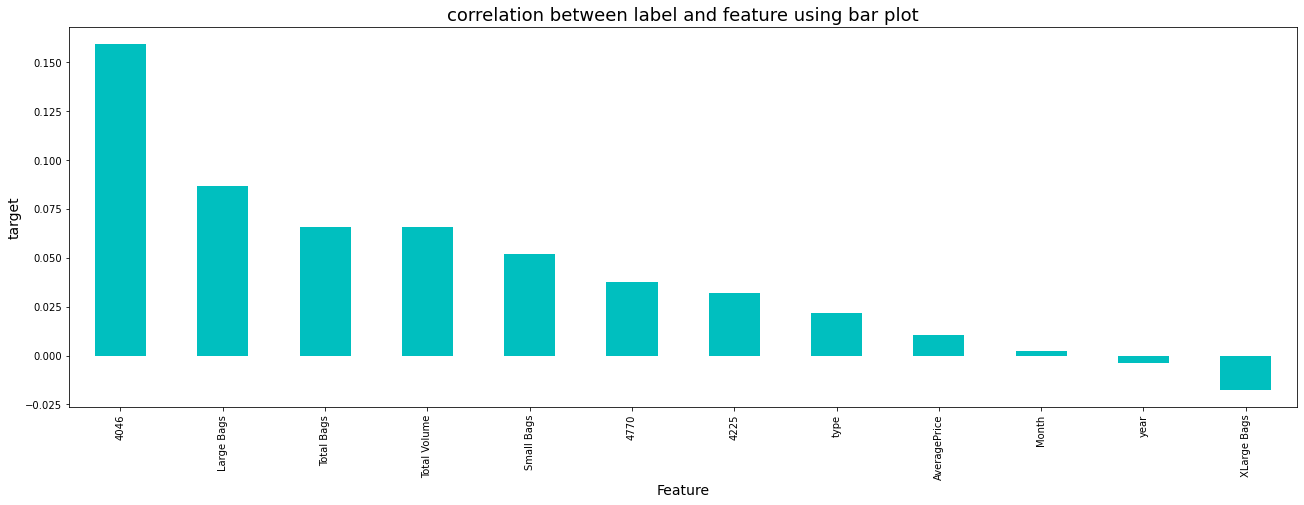

In [104]:
plt.figure(figsize=(22,7))
new_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()


OBSERVATION

Correlation of all the features after using bar plot is positive with respect to region. 
Column year is negatively correlated.

### STANDARD SCALING 

In [105]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(X)
X = pd.DataFrame(X,columns=X.columns)

### MultiCollinearity with Variance Inflation Factor 

In [106]:
# Finding varience inflation factor in each scaled column
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF values"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [107]:
calc_vif(X)

,Features,VIF values
0,AveragePrice,27.381805
1,Total Volume,53.082040
2,4046,6.728167
3,4225,11.935052
4,4770,3.786218
5,Total Bags,34.332110
6,Small Bags,17.222468
7,Large Bags,3.441706
8,XLarge Bags,2.523836
9,type,8.677869


In [108]:
X.drop("Total Volume",axis=1, inplace=True)

In [109]:
calc_vif(X)

,Features,VIF values
0,AveragePrice,26.674590
1,4046,3.488393
2,4225,4.382717
3,4770,3.775079
4,Total Bags,25.520193
5,Small Bags,17.211121
6,Large Bags,3.391813
7,XLarge Bags,2.510619
8,type,8.403659
9,year,22.389863


In [110]:
X.drop("Total Bags",axis=1, inplace=True)

In [111]:
calc_vif(X)

,Features,VIF values
0,AveragePrice,25.134755
1,4046,3.487887
2,4225,4.187169
3,4770,3.770786
4,Small Bags,3.561812
5,Large Bags,1.866874
6,XLarge Bags,2.507376
7,type,8.357661
8,year,21.428071
9,Month,4.268009


In [112]:
X.drop("year",axis=1, inplace=True)

In [113]:
calc_vif(X)

,Features,VIF values
0,AveragePrice,8.982097
1,4046,3.334454
2,4225,4.164288
3,4770,3.698614
4,Small Bags,3.538417
5,Large Bags,1.801432
6,XLarge Bags,2.481618
7,type,8.345283
8,Month,4.062239


OBSERVATION

VIF values are all under 10 which removes the multicollinearity problem.

In [114]:
X

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,Month
0,1.33,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-1.126094,0,12
1,1.35,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-1.126094,0,12
2,0.93,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-1.126094,0,12
3,1.08,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-1.126094,0,12
4,1.28,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-1.126094,0,11
...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-1.126094,1,2
18245,1.71,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-1.126094,1,1
18246,1.87,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-1.126094,1,1
18247,1.93,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-1.126094,1,1


In [115]:
Y

,region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [116]:
X.shape

(17782, 9)

In [117]:
Y.shape

(17782, 1)

OBSERVATION

Our data set is ready for Machine Learning.


# MACHINE LEARNING 

#### Since the y (Target = 'Region') has Categorical values, we will use Logistic Regression 

## Finding Best Random State 

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
LR = LogisticRegression()

In [119]:
maxAccu = 0   # maximum accuracy
maxRS = 0     # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=i)
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state       ', maxRS)

accuracy 0.4273263986505482 random_state 1
accuracy 0.4273263986505482 random_state        1
accuracy 0.4256395839190329 random_state 2
accuracy 0.40905257239246556 random_state 3
accuracy 0.43519820073095306 random_state 4
accuracy 0.43519820073095306 random_state        4
accuracy 0.4273263986505482 random_state 5
accuracy 0.4245150407646893 random_state 6
accuracy 0.41748664605004215 random_state 7
accuracy 0.4132696092212539 random_state 8
accuracy 0.4259207197076188 random_state 9
accuracy 0.4219848186674164 random_state 10
accuracy 0.4259207197076188 random_state 11
accuracy 0.4335113859994377 random_state 12
accuracy 0.4295754849592353 random_state 13
accuracy 0.4143941523755974 random_state 14
accuracy 0.4217036828788305 random_state 15
accuracy 0.4146752881641833 random_state 16
accuracy 0.41889232499297163 random_state 17
accuracy 0.4146752881641833 random_state 18
accuracy 0.4107393871239809 random_state 19
accuracy 0.430418892324993 random_state 20
accuracy 0.42788867022772

In [120]:
# Importing required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [135]:
# creating a function to run all the classifiers

def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=47)  # random_state 47 was the best random_state
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [136]:
#Logistic Regression
model = LogisticRegression()
classifier(model, X, Y)

Accuracy Score: 44.86927185830756

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.55      0.49        66
           1       0.17      0.40      0.24        52
           2       0.51      0.59      0.55        59
           3       0.27      0.23      0.25        60
           4       0.46      0.36      0.40        67
           5       0.44      0.37      0.40        68
           6       0.72      0.73      0.72        66
           7       0.45      0.60      0.51        50
           8       0.76      0.71      0.74        84
           9       0.54      0.71      0.61        78
          10       0.39      0.32      0.35        69
          11       0.51      0.54      0.52        76
          12       0.52      0.54      0.53        82
          13       0.13      0.09      0.11        67
          14       0.61      0.48      0.54        79
          15       0.52      0.57      0.54        56
          16       0.2

In [137]:
#Gaussian Naive Bayes
model = GaussianNB()
classifier(model, X, Y)

Accuracy Score: 7.590666291818948

Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.29      0.08        66
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        59
           3       0.14      0.10      0.12        60
           4       0.00      0.00      0.00        67
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00        66
           7       0.11      0.12      0.12        50
           8       0.00      0.00      0.00        84
           9       0.21      0.28      0.24        78
          10       0.00      0.00      0.00        69
          11       0.00      0.00      0.00        76
          12       0.04      0.07      0.05        82
          13       0.15      0.04      0.07        67
          14       0.00      0.00      0.00        79
          15       0.75      0.11      0.19        56
          16       0.0

In [138]:
#SVC Classifier
model = SVC(kernel='rbf')
classifier(model, X, Y)

Accuracy Score: 45.656452066348045

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.67      0.39        66
           1       0.21      0.54      0.30        52
           2       0.52      0.58      0.55        59
           3       0.57      0.43      0.49        60
           4       0.62      0.27      0.38        67
           5       0.26      0.24      0.25        68
           6       0.87      0.68      0.76        66
           7       0.38      0.40      0.39        50
           8       0.76      0.73      0.74        84
           9       0.39      0.65      0.49        78
          10       0.50      0.41      0.45        69
          11       0.62      0.51      0.56        76
          12       0.60      0.65      0.62        82
          13       0.54      0.43      0.48        67
          14       0.81      0.56      0.66        79
          15       0.77      0.61      0.68        56
          16       0.

In [139]:
model = SVC(kernel='linear')
classifier(model, X, Y)

Accuracy Score: 65.61709305594601

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.74      0.68        66
           1       0.29      0.75      0.42        52
           2       0.78      0.85      0.81        59
           3       0.76      0.63      0.69        60
           4       0.66      0.75      0.70        67
           5       0.51      0.57      0.54        68
           6       0.95      0.94      0.95        66
           7       0.51      0.68      0.58        50
           8       0.88      0.82      0.85        84
           9       0.80      0.76      0.78        78
          10       0.59      0.59      0.59        69
          11       0.64      0.74      0.68        76
          12       0.80      0.72      0.76        82
          13       0.49      0.64      0.55        67
          14       0.73      0.77      0.75        79
          15       0.83      0.88      0.85        56
          16       0.8

In [140]:
model = SVC(kernel='poly')
classifier(model, X, Y)

Accuracy Score: 40.59600787180208

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.53      0.38        66
           1       0.22      0.52      0.31        52
           2       0.61      0.63      0.62        59
           3       0.55      0.52      0.53        60
           4       0.48      0.21      0.29        67
           5       0.41      0.29      0.34        68
           6       0.97      0.55      0.70        66
           7       0.56      0.44      0.49        50
           8       0.98      0.54      0.69        84
           9       0.66      0.49      0.56        78
          10       0.19      0.36      0.25        69
          11       0.64      0.30      0.41        76
          12       0.86      0.60      0.71        82
          13       0.34      0.36      0.35        67
          14       0.79      0.39      0.53        79
          15       0.86      0.54      0.66        56
          16       0.8

In [141]:
#Decision Tree Classifier
model = DecisionTreeClassifier()
classifier(model, X, Y)

Accuracy Score: 78.85858869834131

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        66
           1       0.75      0.73      0.74        52
           2       0.91      0.90      0.91        59
           3       0.82      0.68      0.75        60
           4       0.87      0.79      0.83        67
           5       0.69      0.74      0.71        68
           6       0.98      0.92      0.95        66
           7       0.76      0.90      0.83        50
           8       0.92      0.95      0.94        84
           9       0.81      0.71      0.75        78
          10       0.74      0.71      0.73        69
          11       0.90      0.79      0.84        76
          12       0.90      0.79      0.84        82
          13       0.67      0.72      0.69        67
          14       0.71      0.84      0.77        79
          15       0.89      0.91      0.90        56
          16       0.8

In [142]:
#KNeighbors Classifier
model = KNeighborsClassifier()
classifier(model, X, Y)

Accuracy Score: 65.98256958110767

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.83      0.69        66
           1       0.42      0.62      0.50        52
           2       0.70      0.88      0.78        59
           3       0.68      0.60      0.64        60
           4       0.54      0.66      0.59        67
           5       0.61      0.60      0.61        68
           6       0.76      0.71      0.73        66
           7       0.51      0.74      0.60        50
           8       0.91      0.85      0.88        84
           9       0.74      0.68      0.71        78
          10       0.49      0.70      0.57        69
          11       0.66      0.78      0.71        76
          12       0.85      0.74      0.79        82
          13       0.51      0.52      0.52        67
          14       0.82      0.85      0.83        79
          15       0.87      0.84      0.85        56
          16       0.7

In [143]:
#SGD Classifier
model = SGDClassifier()
classifier(model, X, Y)

Accuracy Score: 23.559179083497327

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.14      0.17      0.15        52
           2       0.40      0.14      0.20        59
           3       0.81      0.22      0.34        60
           4       0.11      0.75      0.19        67
           5       0.00      0.00      0.00        68
           6       0.83      0.67      0.74        66
           7       0.88      0.14      0.24        50
           8       0.61      0.40      0.49        84
           9       0.56      0.13      0.21        78
          10       0.45      0.07      0.12        69
          11       0.14      0.01      0.02        76
          12       0.48      0.13      0.21        82
          13       0.05      0.03      0.04        67
          14       0.21      0.44      0.29        79
          15       0.75      0.43      0.55        56
          16       0.

In [144]:
#Random Forest Classifier
model = RandomForestClassifier(random_state=47)
classifier(model, X, Y)

Accuracy Score: 89.93533876862526

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        66
           1       0.79      0.79      0.79        52
           2       0.89      0.97      0.93        59
           3       0.92      0.80      0.86        60
           4       0.92      0.88      0.90        67
           5       0.89      0.79      0.84        68
           6       0.98      0.97      0.98        66
           7       0.92      0.94      0.93        50
           8       0.99      0.96      0.98        84
           9       0.93      0.85      0.89        78
          10       0.84      0.94      0.89        69
          11       0.93      0.88      0.91        76
          12       0.98      0.99      0.98        82
          13       0.79      0.84      0.81        67
          14       0.88      0.90      0.89        79
          15       0.98      1.00      0.99        56
          16       0.9

In [145]:
#ExtraTrees Classifier
model = ExtraTreesClassifier()
classifier(model, X, Y)

Accuracy Score: 91.62215350014057

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        66
           1       0.89      0.90      0.90        52
           2       0.89      0.98      0.94        59
           3       0.92      0.82      0.87        60
           4       0.91      0.88      0.89        67
           5       0.90      0.79      0.84        68
           6       0.99      1.00      0.99        66
           7       0.94      0.98      0.96        50
           8       0.99      0.96      0.98        84
           9       0.94      0.87      0.91        78
          10       0.85      0.91      0.88        69
          11       0.94      0.95      0.94        76
          12       0.98      1.00      0.99        82
          13       0.82      0.93      0.87        67
          14       0.88      0.90      0.89        79
          15       0.98      1.00      0.99        56
          16       0.9

In [146]:
#AdaBoost Classifier
model = AdaBoostClassifier()
classifier(model, X, Y)

Accuracy Score: 6.8034860837784645

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.03      0.42      0.06        52
           2       0.10      0.44      0.16        59
           3       0.00      0.00      0.00        60
           4       0.06      0.09      0.07        67
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00        66
           7       0.04      1.00      0.08        50
           8       0.00      0.00      0.00        84
           9       0.00      0.00      0.00        78
          10       0.00      0.00      0.00        69
          11       0.07      0.33      0.12        76
          12       0.00      0.00      0.00        82
          13       0.00      0.00      0.00        67
          14       0.00      0.00      0.00        79
          15       0.00      0.00      0.00        56
          16       0.

In [ ]:
#Gradient Boosting Classifier
model = GradientBoostingClassifier()
classifier(model, X, Y)

Accuracy Score: 82.37278605566487

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        66
           1       0.70      0.75      0.72        52
           2       0.90      0.95      0.93        59
           3       0.83      0.72      0.77        60
           4       0.82      0.81      0.81        67
           5       0.83      0.79      0.81        68
           6       0.98      0.92      0.95        66
           7       0.83      0.88      0.85        50
           8       0.99      0.90      0.94        84
           9       0.93      0.71      0.80        78
          10       0.72      0.84      0.78        69
          11       0.92      0.78      0.84        76
          12       0.90      0.90      0.90        82
          13       0.69      0.81      0.74        67
          14       0.80      0.85      0.82        79
          15       0.94      0.91      0.93        56
          16       0.8

OBSERVATION 

Comparing all the above the ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

## HYPER PARAMETER TUNING 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=47)


In [ ]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15],
              'random_state' : [47]}

In [ ]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_ 

#### FINAL MODEL 

In [ ]:
final_modelc = ExtraTreesClassifier(criterion = 'entropy', max_features = 'auto', n_jobs = 5, random_state = 47)   # final model with best parameters


In [ ]:
final_predc = final_modelc.predict(x_test)   # predicting with best parameters


In [ ]:
best_acc_score = (accuracy_score(y_test, final_predc))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", best_acc_score)

In [ ]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, X, Y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

In [ ]:
x_test.shape

In [ ]:
y_test.shape

### SAVING MODEL IN PICKLE FORMAT 

In [ ]:
# pickeling or serialization of a file
import pickle
filename = 'Avacado_Project_Classification_Final_Model.pkl'
pickle.dump(final_modelc, open(filename, 'wb'))

### PREDICTION 

In [ ]:
import numpy as np
ac=np.array(y_test)
ac

In [ ]:
ac.shape

In [ ]:
acdf = pd.DataFrame(ac)

In [ ]:
acdf

In [ ]:
predictedc=np.array(final_modelc.predict(x_test))

In [ ]:
predictedc

In [ ]:
df_comparison = pd.DataFrame(predictedc)

In [ ]:
df_comparison

In [ ]:
frames = [acdf , df_comparison]

In [ ]:
comparison = pd.concat(frames, axis = 1)

In [ ]:
comparison

In [ ]:
comparison.to_csv('Avacado_Project_Classification_By_Region_Prediction.csv')

OBSERVATION
 Regions of avasados predicted

# FINAL CONCLUSION

When we used "Average Price" as our target data set , we used Linear Regression as target value had continuous data.
We find our best bodel as Extra Tree Regressor for this and best random state is found to be 194.

When we used "Region" as our target data set, we used Logistic Regression as target value had categorial data.
We find our best bodel as Extra Tree Regressor for this and best random state is found to be 47.
